Excercise:
Cluster iris dataset using petal width and length features

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
%matplotlib inline

# Read Data

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


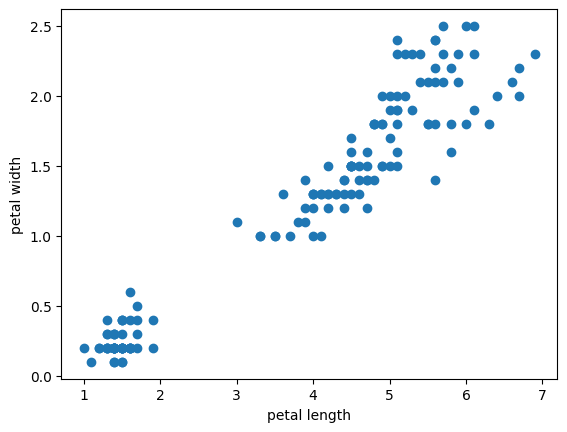

In [4]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

# K-Means clustering

In [5]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

## Find K with Elbow Method

In [6]:
k_rng = range(1,11)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(iris_df[['petal length (cm)', 'petal width (cm)']])
  sse.append(km.inertia_)
sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.465989010989013,
 13.916908757908757,
 11.084575219743066,
 9.19386673204751,
 7.681931157817818,
 6.577841269841268,
 5.658058950853068]

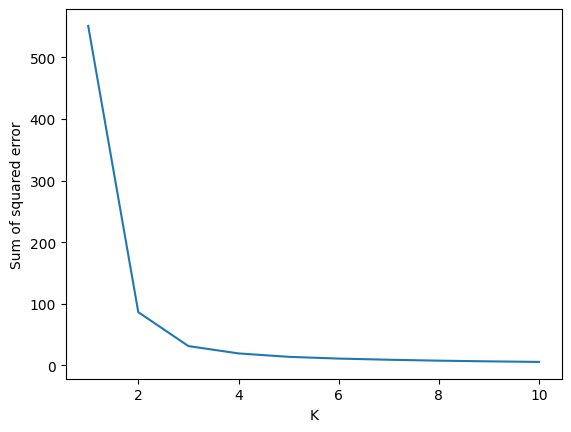

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

K nya 3

## Cluster without scaling

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(iris_df[['petal length (cm)', 'petal width (cm)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
iris_df['cluster'] = y_predicted
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0.0,1
1,4.9,3.0,1.4,0.2,0.0,1
2,4.7,3.2,1.3,0.2,0.0,1
3,4.6,3.1,1.5,0.2,0.0,1
4,5.0,3.6,1.4,0.2,0.0,1


In [11]:
import seaborn as sns

# Visualize

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.1'),
  Text(2, 0, '1.2'),
  Text(3, 0, '1.3'),
  Text(4, 0, '1.4'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.6'),
  Text(7, 0, '1.7'),
  Text(8, 0, '1.9'),
  Text(9, 0, '3.0'),
  Text(10, 0, '3.3'),
  Text(11, 0, '3.5'),
  Text(12, 0, '3.6'),
  Text(13, 0, '3.7'),
  Text(14, 0, '3.8'),
  Text(15, 0, '3.9'),
  Text(16, 0, '4.0'),
  Text(17, 0, '4.1'),
  Text(18, 0, '4.2'),
  Text(19, 0, '4.3'),
  Text(20, 0, '4.4'),
  Text(21, 0, '4.5'),
  Text(22, 0, '4.6'),
  Text(23, 0, '4.7'),
  Text(24, 0, '4.8'),
  Text(25, 0, '4.9'),
  Text(26, 0, '5.0'),
  Text(27, 0, '5.1'),
  Text(28, 0, '5.2'),
  Text(29, 0, '5.3'),
  Text(30, 0, '5.4'),
  Text(31, 0, '5.5'),
  Text(32, 0, '5.6'),
  Text(33, 0, '5.7'),
  Text(34, 0,

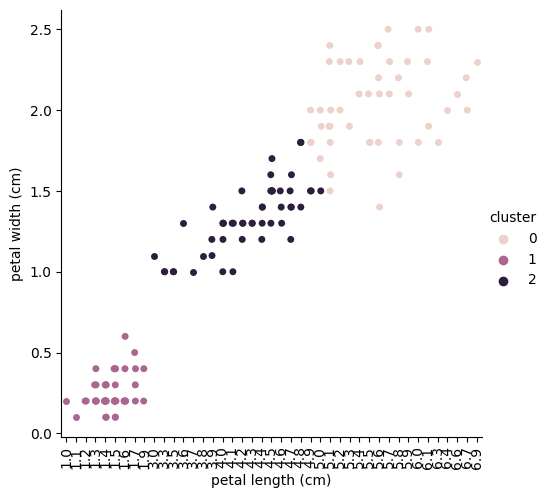

In [12]:
sns.catplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='cluster')
plt.xticks(rotation=90)

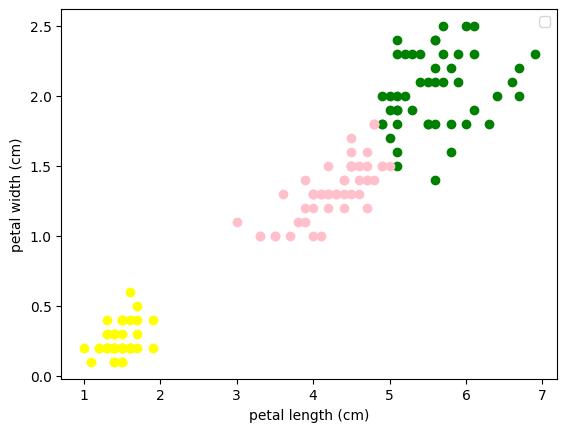

In [13]:
iris_df1 = iris_df[iris_df.cluster==0]
iris_df2 = iris_df[iris_df.cluster==1]
iris_df3 = iris_df[iris_df.cluster==2]

plt.scatter(iris_df1['petal length (cm)'],iris_df1['petal width (cm)'], color='green')
plt.scatter(iris_df2['petal length (cm)'],iris_df2['petal width (cm)'], color='yellow')
plt.scatter(iris_df3['petal length (cm)'],iris_df3['petal width (cm)'], color='pink')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

### Simplified way

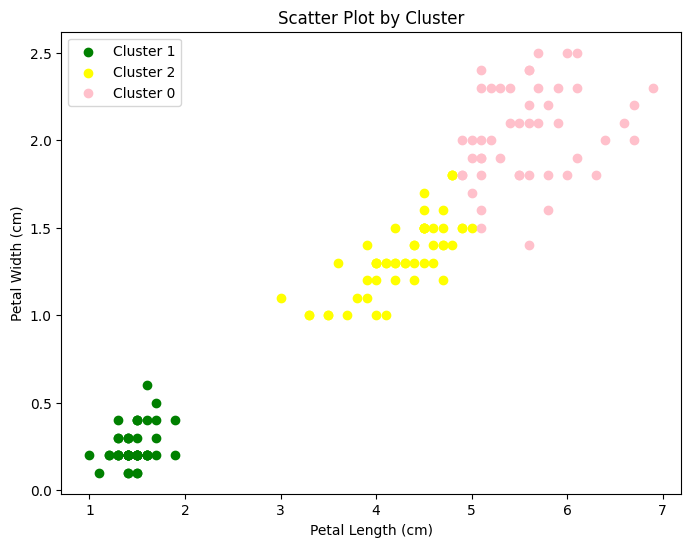

In [14]:
# Define the unique cluster labels
unique_clusters = iris_df['cluster'].unique()

# Define colors for each cluster
colors = ['green', 'yellow', 'pink']  # Add more colors as needed

# Create a scatter plot for each cluster
plt.figure(figsize=(8, 6))
for i, cluster_label in enumerate(unique_clusters):
    cluster_df = iris_df[iris_df['cluster'] == cluster_label]
    plt.scatter(cluster_df['petal length (cm)'], cluster_df['petal width (cm)'], color=colors[i], label=f'Cluster {cluster_label}')

# Add labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

# Show the plot
plt.title('Scatter Plot by Cluster')
plt.show()

## Cluster with Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
df_petal = iris_df[['petal length (cm)', 'petal width (cm)']]
scaler = MinMaxScaler()
scaler.fit(df_petal[['petal length (cm)']])
df_petal['petal length (cm)'] = scaler.transform(df_petal[['petal length (cm)']])

scaler.fit(df_petal[['petal width (cm)']])
df_petal['petal width (cm)'] = scaler.transform(df_petal[['petal width (cm)']])

<ipython-input-28-afe0c3f3d796>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal['petal length (cm)'] = scaler.transform(df_petal[['petal length (cm)']])
<ipython-input-28-afe0c3f3d796>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal['petal width (cm)'] = scaler.transform(df_petal[['petal width (cm)']])


In [29]:
df_petal.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [30]:
km = KMeans(n_clusters=3)
km
y_predicted_scaled = km.fit_predict(df_petal)
y_predicted_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [31]:
df_petal['cluster'] = y_predicted_scaled
df_petal.head()

<ipython-input-31-820c365cae3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal['cluster'] = y_predicted_scaled


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


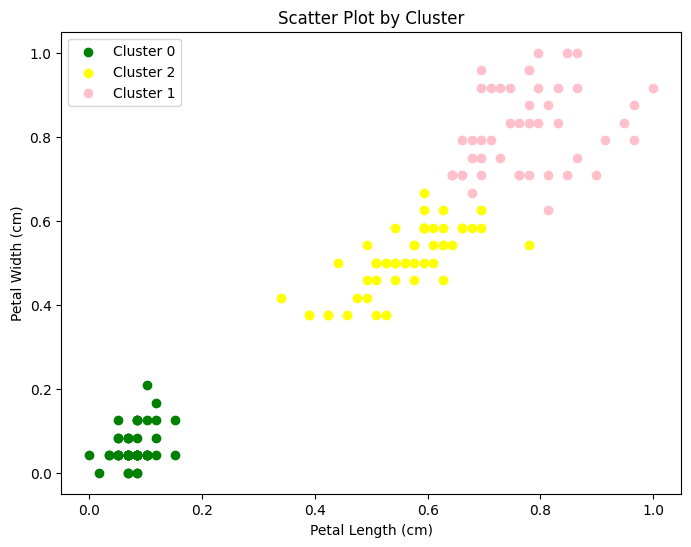

In [32]:
# Define the unique cluster labels
unique_clusters = df_petal['cluster'].unique()

# Define colors for each cluster
colors = ['green', 'yellow', 'pink']  # Add more colors as needed

# Create a scatter plot for each cluster
plt.figure(figsize=(8, 6))
for i, cluster_label in enumerate(unique_clusters):
    cluster_df = df_petal[df_petal['cluster'] == cluster_label]
    plt.scatter(cluster_df['petal length (cm)'], cluster_df['petal width (cm)'], color=colors[i], label=f'Cluster {cluster_label}')

# Add labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

# Show the plot
plt.title('Scatter Plot by Cluster')
plt.show()